In [232]:
import os, sys
import glob
import json
import numpy as np

from collections import defaultdict

from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
module_path = os.path.abspath("..")
if module_path not in sys.path:
    sys.path.append(module_path)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from dataset_utils.Dataset import Dataset
from dataset_utils.DataInitiator import OmniDataInitiator
from dataset_utils.config import DS_ROOT
from dataset_utils.utils import imshow_by_name

print(matplotlib.__version__)

1.4.3


# 不正解の分析

## 設定

In [245]:
import copy

class ClassificationResults():
    def __init__(self):
        self.results = []
        
    
    def add_result(self, data, label, output, conf_score):
        self.results.append(ClassificationResult(data, label, output, conf_score))
        
    def load_result_file(self, result_path, data_initiator):
        with open(result_path) as fr:
            results = json.load(fr)
        for pid, result in results.items():
            paths = result['test']['paths']
            ts = result['test']['t']
            ys = result['test']['y']
            probs = result['test']['probs']

            for i in range(len(paths)):
                data = data_initiator.init(paths[i])
                self.add_result(data, ts[i], ys[i], probs[i])
        
    def get_correct_results(self):
        new_crs = copy.deepcopy(self)
        new_crs.results =  [r for r in new_crs.results if r.right == 1]
        return new_crs
    
    def get_wrong_results(self):
        new_crs = copy.deepcopy(self)
        new_crs.results =  [r for r in new_crs.results if r.right == 0]
        return new_crs
    
    def get_by_pid(self, pid):
        new_crs = copy.deepcopy(self)
        new_crs.results =  [r for r in new_crs.results if r.data.pid == pid]
        return new_crs
    
    def get_by_label(self, label):
        new_crs = copy.deepcopy(self)
        new_crs.results =  [r for r in new_crs.results if r.label == label]
        return new_crs
    
    def sort_by_fname(self):
        self.results = sorted(self.results, key=lambda result: result.data.name)
    
    def target_count(self):
        counter = defaultdict(int)
        for r in self.results:
             counter[r.data.target] += 1
        return counter
    
    def 
    

        
    
        
    def __len__(self):
        return len(self.results)
    
    def __getitem__(self, i):
        return self.results[i]
    
    def __str__(self):
        pass
        


class ClassificationResult():
    def __init__(self, data, label, output, conf_score):
        self.data = data
        self.label = int(label)
        self.output = int(output)
        self.conf_score = conf_score
        self.right = 1 if self.label == self.output else 0
        
    def __str__(self):
        imshow_by_name(self.data.name)
        s = "file: %s\nlabel: %s\noutput: %s\nresult: %s\nconf_score: %s" % (self.data.name, str(self.label), str(self.output), str(self.right), str(self.conf_score))
        return s
        

In [246]:
pid = '3'
config = "with_face_feature_v1_00"
result_dir = "../train/result/"
result_path = os.path.join(result_dir, config, "all.json")
initiator = OmniDataInitiator()
results = ClassificationResults()
results.load_result_file(result_path, initiator)
print(len(results))

5451


In [271]:
results3 = results.get_by_pid(3)
results3.sort_by_fname()
correct = results3.get_correct_results()
wrong = results3.get_wrong_results()
print("correct: %d" % len(correct))
print("wrong: %d" % len(wrong))

correct: 352
wrong: 31


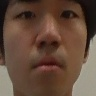

file: 0003_0_B_00_00000100.jpg
label: 1
output: 0
result: 0
conf_score: [0.6732040047645569, 0.3267960250377655]


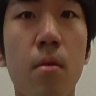

file: 0003_0_B_00_00000105.jpg
label: 1
output: 0
result: 0
conf_score: [0.8906377553939819, 0.10936222970485687]


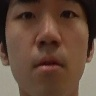

file: 0003_0_B_00_00000110.jpg
label: 1
output: 0
result: 0
conf_score: [0.5024520754814148, 0.49754798412323]


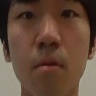

file: 0003_0_B_02_00000125.jpg
label: 1
output: 0
result: 0
conf_score: [0.9558093547821045, 0.044190648943185806]


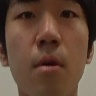

file: 0003_0_B_02_00000130.jpg
label: 1
output: 0
result: 0
conf_score: [0.6330244541168213, 0.3669756352901459]


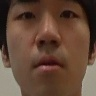

file: 0003_0_B_02_00000135.jpg
label: 1
output: 0
result: 0
conf_score: [0.7562946081161499, 0.2437053918838501]


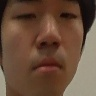

file: 0003_0_B_32_00000100.jpg
label: 1
output: 0
result: 0
conf_score: [0.6652811765670776, 0.33471885323524475]


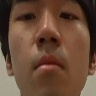

file: 0003_0_B_40_00000255.jpg
label: 0
output: 1
result: 0
conf_score: [0.4118008017539978, 0.588199257850647]


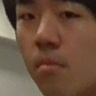

file: 0003_0_C_00_00000100.jpg
label: 1
output: 0
result: 0
conf_score: [0.6848204135894775, 0.31517964601516724]


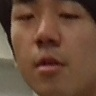

file: 0003_0_C_00_00000105.jpg
label: 1
output: 0
result: 0
conf_score: [0.843943178653717, 0.15605677664279938]


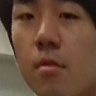

file: 0003_0_C_00_00000110.jpg
label: 1
output: 0
result: 0
conf_score: [0.5037909150123596, 0.49620914459228516]


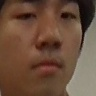

file: 0003_0_C_01_00000050.jpg
label: 1
output: 0
result: 0
conf_score: [0.7917394638061523, 0.20826052129268646]


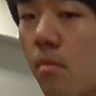

file: 0003_0_C_01_00000085.jpg
label: 1
output: 0
result: 0
conf_score: [0.6005094051361084, 0.3994905948638916]


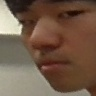

file: 0003_0_C_01_00000110.jpg
label: 1
output: 0
result: 0
conf_score: [0.9547315835952759, 0.045268379151821136]


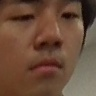

file: 0003_0_C_07_00000045.jpg
label: 0
output: 1
result: 0
conf_score: [0.08872189372777939, 0.9112780690193176]


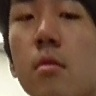

file: 0003_0_C_07_00000110.jpg
label: 0
output: 1
result: 0
conf_score: [0.20500244200229645, 0.7949975728988647]


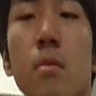

file: 0003_0_C_08_00000015.jpg
label: 0
output: 1
result: 0
conf_score: [0.3291987478733063, 0.6708012223243713]


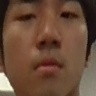

file: 0003_0_C_08_00000055.jpg
label: 0
output: 1
result: 0
conf_score: [0.23843343555927277, 0.7615665793418884]


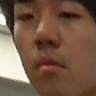

file: 0003_0_C_08_00000060.jpg
label: 0
output: 1
result: 0
conf_score: [0.12530171871185303, 0.8746982216835022]


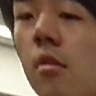

file: 0003_0_C_08_00000110.jpg
label: 0
output: 1
result: 0
conf_score: [0.3931744396686554, 0.6068255305290222]


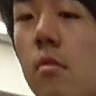

file: 0003_0_C_08_00000115.jpg
label: 0
output: 1
result: 0
conf_score: [0.18373334407806396, 0.8162665963172913]


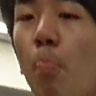

file: 0003_0_C_08_00000120.jpg
label: 0
output: 1
result: 0
conf_score: [0.38096344470977783, 0.6190365552902222]


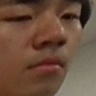

file: 0003_0_C_09_00000060.jpg
label: 0
output: 1
result: 0
conf_score: [0.34344735741615295, 0.6565526723861694]


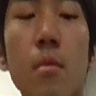

file: 0003_0_C_11_00000125.jpg
label: 0
output: 1
result: 0
conf_score: [0.2028050273656845, 0.7971949577331543]


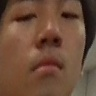

file: 0003_0_C_13_00000010.jpg
label: 0
output: 1
result: 0
conf_score: [0.3347574770450592, 0.6652424931526184]


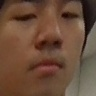

file: 0003_0_C_13_00000065.jpg
label: 0
output: 1
result: 0
conf_score: [0.30586546659469604, 0.694134533405304]


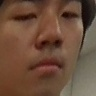

file: 0003_0_C_13_00000070.jpg
label: 0
output: 1
result: 0
conf_score: [0.07266905158758163, 0.9273309707641602]


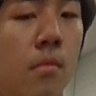

file: 0003_0_C_13_00000075.jpg
label: 0
output: 1
result: 0
conf_score: [0.33086448907852173, 0.6691355109214783]


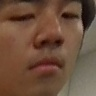

file: 0003_0_C_13_00000125.jpg
label: 0
output: 1
result: 0
conf_score: [0.27083104848861694, 0.7291690111160278]


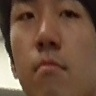

file: 0003_0_C_31_00000140.jpg
label: 1
output: 0
result: 0
conf_score: [0.9386891722679138, 0.06131085380911827]


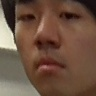

file: 0003_0_C_50_00000035.jpg
label: 1
output: 0
result: 0
conf_score: [0.5610299110412598, 0.43897002935409546]


In [252]:
for result in wrong:
    print(result)

In [ ]:
wrong0 = wrong.get_by_label()

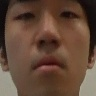

file: 0003_0_B_00_00000010.jpg
label: 1
output: 1
result: 1
conf_score: [0.1996811479330063, 0.8003187775611877]


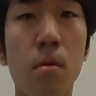

file: 0003_0_B_00_00000025.jpg
label: 1
output: 1
result: 1
conf_score: [0.11118624359369278, 0.8888137340545654]


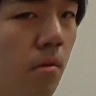

file: 0003_0_B_00_00000030.jpg
label: 1
output: 1
result: 1
conf_score: [0.050327397882938385, 0.9496725797653198]


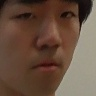

file: 0003_0_B_00_00000040.jpg
label: 1
output: 1
result: 1
conf_score: [0.1247890293598175, 0.8752109408378601]


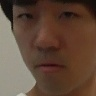

file: 0003_0_B_00_00000045.jpg
label: 1
output: 1
result: 1
conf_score: [0.005045049823820591, 0.9949548840522766]


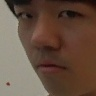

file: 0003_0_B_00_00000050.jpg
label: 1
output: 1
result: 1
conf_score: [0.028919391334056854, 0.9710806012153625]


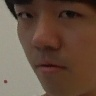

file: 0003_0_B_00_00000055.jpg
label: 1
output: 1
result: 1
conf_score: [0.0024149289820343256, 0.9975850582122803]


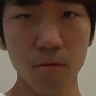

file: 0003_0_B_00_00000060.jpg
label: 1
output: 1
result: 1
conf_score: [0.3663797974586487, 0.6336202025413513]


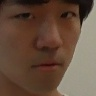

file: 0003_0_B_00_00000075.jpg
label: 1
output: 1
result: 1
conf_score: [0.008308078162372112, 0.9916919469833374]


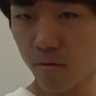

file: 0003_0_B_00_00000080.jpg
label: 1
output: 1
result: 1
conf_score: [0.10040464252233505, 0.8995953798294067]


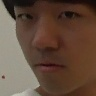

file: 0003_0_B_00_00000085.jpg
label: 1
output: 1
result: 1
conf_score: [0.010481180623173714, 0.9895188212394714]


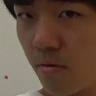

file: 0003_0_B_00_00000090.jpg
label: 1
output: 1
result: 1
conf_score: [0.00038995398790575564, 0.9996101260185242]


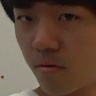

file: 0003_0_B_00_00000095.jpg
label: 1
output: 1
result: 1
conf_score: [0.003943275194615126, 0.9960566759109497]


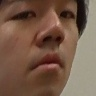

file: 0003_0_B_02_00000015.jpg
label: 1
output: 1
result: 1
conf_score: [0.17503580451011658, 0.8249642252922058]


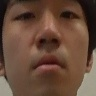

file: 0003_0_B_02_00000020.jpg
label: 1
output: 1
result: 1
conf_score: [0.1164640486240387, 0.8835359215736389]


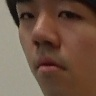

file: 0003_0_B_02_00000030.jpg
label: 1
output: 1
result: 1
conf_score: [0.02257130853831768, 0.9774287343025208]


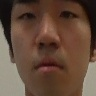

file: 0003_0_B_02_00000040.jpg
label: 1
output: 1
result: 1
conf_score: [0.06024671345949173, 0.9397532939910889]


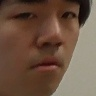

file: 0003_0_B_02_00000045.jpg
label: 1
output: 1
result: 1
conf_score: [0.02780591882765293, 0.9721941351890564]


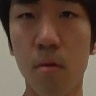

file: 0003_0_B_02_00000060.jpg
label: 1
output: 1
result: 1
conf_score: [0.030462870374321938, 0.9695371389389038]


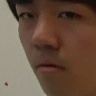

file: 0003_0_B_02_00000065.jpg
label: 1
output: 1
result: 1
conf_score: [0.030717164278030396, 0.969282865524292]


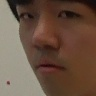

file: 0003_0_B_02_00000075.jpg
label: 1
output: 1
result: 1
conf_score: [0.06954451650381088, 0.9304555058479309]


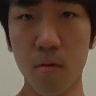

file: 0003_0_B_02_00000080.jpg
label: 1
output: 1
result: 1
conf_score: [0.012848945334553719, 0.987151026725769]


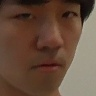

file: 0003_0_B_02_00000085.jpg
label: 1
output: 1
result: 1
conf_score: [0.012949928641319275, 0.9870500564575195]


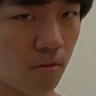

file: 0003_0_B_02_00000095.jpg
label: 1
output: 1
result: 1
conf_score: [0.015458451583981514, 0.9845415353775024]


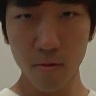

file: 0003_0_B_02_00000100.jpg
label: 1
output: 1
result: 1
conf_score: [0.21745038032531738, 0.7825496196746826]


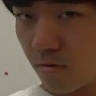

file: 0003_0_B_02_00000105.jpg
label: 1
output: 1
result: 1
conf_score: [0.020406663417816162, 0.9795932769775391]


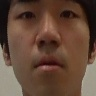

file: 0003_0_B_02_00000140.jpg
label: 1
output: 1
result: 1
conf_score: [0.3177723288536072, 0.6822277307510376]


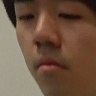

file: 0003_0_B_08_00000005.jpg
label: 0
output: 0
result: 1
conf_score: [0.8246281147003174, 0.17537187039852142]


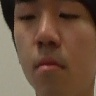

file: 0003_0_B_08_00000025.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999898672103882, 1.0143305189558305e-05]


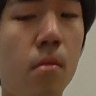

file: 0003_0_B_08_00000030.jpg
label: 0
output: 0
result: 1
conf_score: [0.9966495633125305, 0.0033504089806228876]


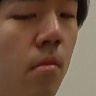

file: 0003_0_B_08_00000040.jpg
label: 0
output: 0
result: 1
conf_score: [0.9655426144599915, 0.03445740044116974]


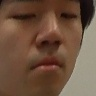

file: 0003_0_B_08_00000045.jpg
label: 0
output: 0
result: 1
conf_score: [0.9596146941184998, 0.04038535803556442]


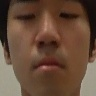

file: 0003_0_B_08_00000050.jpg
label: 0
output: 0
result: 1
conf_score: [0.9973318576812744, 0.002668206114321947]


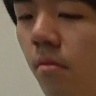

file: 0003_0_B_08_00000055.jpg
label: 0
output: 0
result: 1
conf_score: [0.850426435470581, 0.14957362413406372]


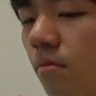

file: 0003_0_B_08_00000065.jpg
label: 0
output: 0
result: 1
conf_score: [0.9950920343399048, 0.004908006638288498]


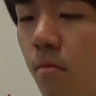

file: 0003_0_B_08_00000070.jpg
label: 0
output: 0
result: 1
conf_score: [0.9947050213813782, 0.005295004695653915]


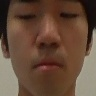

file: 0003_0_B_08_00000075.jpg
label: 0
output: 0
result: 1
conf_score: [0.9998891353607178, 0.00011083504796260968]


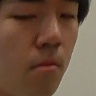

file: 0003_0_B_08_00000080.jpg
label: 0
output: 0
result: 1
conf_score: [0.9747006297111511, 0.02529934048652649]


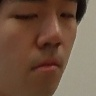

file: 0003_0_B_08_00000085.jpg
label: 0
output: 0
result: 1
conf_score: [0.9913870692253113, 0.008612941950559616]


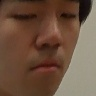

file: 0003_0_B_08_00000090.jpg
label: 0
output: 0
result: 1
conf_score: [0.998485267162323, 0.0015147593803703785]


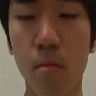

file: 0003_0_B_08_00000095.jpg
label: 0
output: 0
result: 1
conf_score: [0.9998244643211365, 0.00017557875253260136]


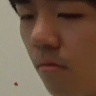

file: 0003_0_B_08_00000100.jpg
label: 0
output: 0
result: 1
conf_score: [0.5761469006538391, 0.4238530695438385]


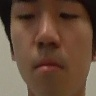

file: 0003_0_B_08_00000120.jpg
label: 0
output: 0
result: 1
conf_score: [0.9990589022636414, 0.0009411511127837002]


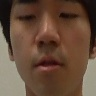

file: 0003_0_B_08_00000125.jpg
label: 0
output: 0
result: 1
conf_score: [0.9898281097412109, 0.010171943344175816]


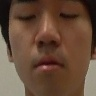

file: 0003_0_B_08_00000130.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999955892562866, 4.4412636270863e-06]


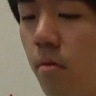

file: 0003_0_B_10_00000005.jpg
label: 0
output: 0
result: 1
conf_score: [0.9924019575119019, 0.007597987540066242]


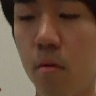

file: 0003_0_B_10_00000025.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999831914901733, 1.6815936760394834e-05]


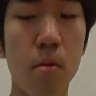

file: 0003_0_B_10_00000030.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999662637710571, 3.369445767020807e-05]


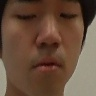

file: 0003_0_B_10_00000035.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999935626983643, 6.452192337746965e-06]


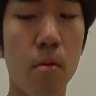

file: 0003_0_B_10_00000040.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999765157699585, 2.350510112592019e-05]


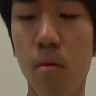

file: 0003_0_B_10_00000045.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999731779098511, 2.683787351998035e-05]


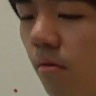

file: 0003_0_B_10_00000050.jpg
label: 0
output: 0
result: 1
conf_score: [0.9968501925468445, 0.003149848897010088]


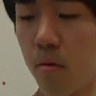

file: 0003_0_B_10_00000070.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999908208847046, 9.140558177023195e-06]


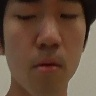

file: 0003_0_B_10_00000075.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999924898147583, 7.479410214727977e-06]


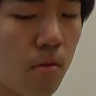

file: 0003_0_B_10_00000080.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999724626541138, 2.75584461633116e-05]


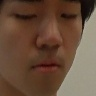

file: 0003_0_B_10_00000085.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999984502792358, 1.5254831851052586e-06]


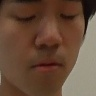

file: 0003_0_B_10_00000090.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999998807907104, 1.7509805161353142e-07]


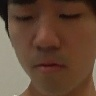

file: 0003_0_B_10_00000095.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999463558197021, 5.369659265852533e-05]


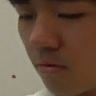

file: 0003_0_B_10_00000100.jpg
label: 0
output: 0
result: 1
conf_score: [0.9994995594024658, 0.0005004086997359991]


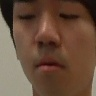

file: 0003_0_B_10_00000120.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999735355377197, 2.650832902872935e-05]


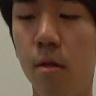

file: 0003_0_B_10_00000125.jpg
label: 0
output: 0
result: 1
conf_score: [0.99993896484375, 6.107586523285136e-05]


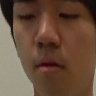

file: 0003_0_B_10_00000130.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999761581420898, 2.389428118476644e-05]


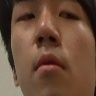

file: 0003_0_B_11_00000020.jpg
label: 0
output: 0
result: 1
conf_score: [0.8440001606941223, 0.1559998095035553]


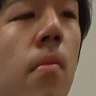

file: 0003_0_B_11_00000050.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999743700027466, 2.5611860110075213e-05]


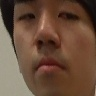

file: 0003_0_B_11_00000060.jpg
label: 0
output: 0
result: 1
conf_score: [0.7277273535728455, 0.27227264642715454]


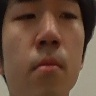

file: 0003_0_B_11_00000070.jpg
label: 0
output: 0
result: 1
conf_score: [0.9996275901794434, 0.00037238525692373514]


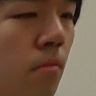

file: 0003_0_B_11_00000095.jpg
label: 0
output: 0
result: 1
conf_score: [0.9993634819984436, 0.0006365121225826442]


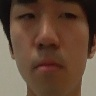

file: 0003_0_B_11_00000100.jpg
label: 0
output: 0
result: 1
conf_score: [0.9997864365577698, 0.00021352052863221616]


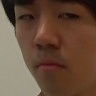

file: 0003_0_B_11_00000105.jpg
label: 0
output: 0
result: 1
conf_score: [0.9995672106742859, 0.000432753877248615]


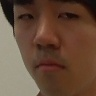

file: 0003_0_B_11_00000110.jpg
label: 0
output: 0
result: 1
conf_score: [0.9987732768058777, 0.001226749736815691]


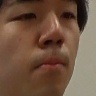

file: 0003_0_B_11_00000130.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999899864196777, 1.0063935405923985e-05]


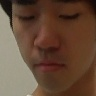

file: 0003_0_B_12_00000010.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999984502792358, 1.5331684153352398e-06]


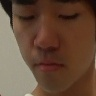

file: 0003_0_B_12_00000015.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999992847442627, 6.843660571576038e-07]


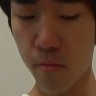

file: 0003_0_B_12_00000020.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999998807907104, 9.070470952110554e-08]


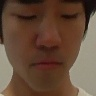

file: 0003_0_B_12_00000025.jpg
label: 0
output: 0
result: 1
conf_score: [1.0, 2.6274127762349053e-08]


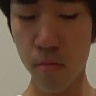

file: 0003_0_B_12_00000055.jpg
label: 0
output: 0
result: 1
conf_score: [1.0, 5.182808138215478e-08]


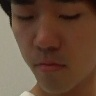

file: 0003_0_B_12_00000065.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999995231628418, 4.4424029965739464e-07]


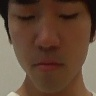

file: 0003_0_B_12_00000070.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999922513961792, 7.729019671387505e-06]


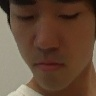

file: 0003_0_B_12_00000105.jpg
label: 0
output: 0
result: 1
conf_score: [1.0, 4.324999736127211e-08]


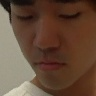

file: 0003_0_B_12_00000110.jpg
label: 0
output: 0
result: 1
conf_score: [1.0, 5.3333764071794576e-08]


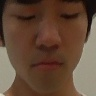

file: 0003_0_B_12_00000120.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999998807907104, 1.0651320536680942e-07]


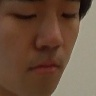

file: 0003_0_B_12_00000125.jpg
label: 0
output: 0
result: 1
conf_score: [0.9998997449874878, 0.00010028534597950056]


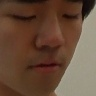

file: 0003_0_B_12_00000130.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999998807907104, 6.90163446392944e-08]


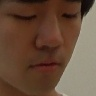

file: 0003_0_B_12_00000135.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999998807907104, 6.328090762508509e-08]


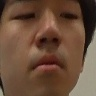

file: 0003_0_B_13_00000005.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999657869338989, 3.4194519685115665e-05]


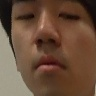

file: 0003_0_B_13_00000010.jpg
label: 0
output: 0
result: 1
conf_score: [0.8963685035705566, 0.10363154113292694]


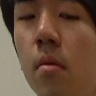

file: 0003_0_B_13_00000015.jpg
label: 0
output: 0
result: 1
conf_score: [0.8297773003578186, 0.17022265493869781]


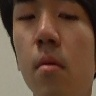

file: 0003_0_B_13_00000020.jpg
label: 0
output: 0
result: 1
conf_score: [0.9293447732925415, 0.07065519690513611]


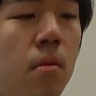

file: 0003_0_B_13_00000055.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999622106552124, 3.77417600248009e-05]


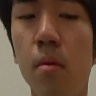

file: 0003_0_B_13_00000060.jpg
label: 0
output: 0
result: 1
conf_score: [0.999724805355072, 0.0002751801803242415]


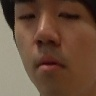

file: 0003_0_B_13_00000065.jpg
label: 0
output: 0
result: 1
conf_score: [0.9810892939567566, 0.018910663202404976]


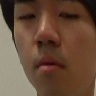

file: 0003_0_B_13_00000070.jpg
label: 0
output: 0
result: 1
conf_score: [0.989267885684967, 0.010732050985097885]


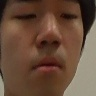

file: 0003_0_B_13_00000075.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999850988388062, 1.4851806554361247e-05]


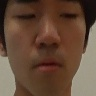

file: 0003_0_B_13_00000100.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999872446060181, 1.2725666238111444e-05]


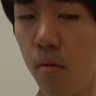

file: 0003_0_B_13_00000110.jpg
label: 0
output: 0
result: 1
conf_score: [0.9975482821464539, 0.002451689448207617]


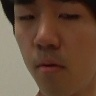

file: 0003_0_B_13_00000115.jpg
label: 0
output: 0
result: 1
conf_score: [0.9971541166305542, 0.002845840295776725]


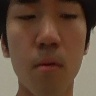

file: 0003_0_B_13_00000120.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999955892562866, 4.383176474220818e-06]


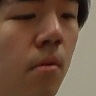

file: 0003_0_B_13_00000125.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999504089355469, 4.9640017095953226e-05]


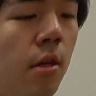

file: 0003_0_B_13_00000130.jpg
label: 0
output: 0
result: 1
conf_score: [0.9997178912162781, 0.00028209236916154623]


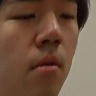

file: 0003_0_B_13_00000135.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999005794525146, 9.9384349596221e-05]


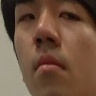

file: 0003_0_B_15_00000070.jpg
label: 0
output: 0
result: 1
conf_score: [0.6118918061256409, 0.3881082236766815]


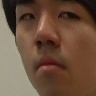

file: 0003_0_B_15_00000115.jpg
label: 0
output: 0
result: 1
conf_score: [0.7904499769210815, 0.20955003798007965]


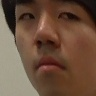

file: 0003_0_B_15_00000120.jpg
label: 0
output: 0
result: 1
conf_score: [0.9949457049369812, 0.005054325331002474]


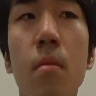

file: 0003_0_B_15_00000125.jpg
label: 0
output: 0
result: 1
conf_score: [0.998377799987793, 0.0016222414560616016]


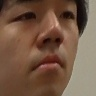

file: 0003_0_B_15_00000140.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999947547912598, 5.296058589010499e-06]


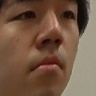

file: 0003_0_B_15_00000145.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999998807907104, 1.061725427575766e-07]


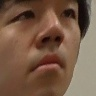

file: 0003_0_B_21_00000055.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999997615814209, 1.7984548605909367e-07]


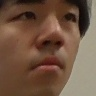

file: 0003_0_B_21_00000080.jpg
label: 0
output: 0
result: 1
conf_score: [1.0, 8.033293141807007e-09]


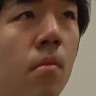

file: 0003_0_B_21_00000105.jpg
label: 0
output: 0
result: 1
conf_score: [1.0, 1.4461752906314018e-09]


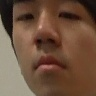

file: 0003_0_B_32_00000005.jpg
label: 1
output: 1
result: 1
conf_score: [0.10537106543779373, 0.8946289420127869]


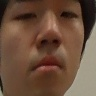

file: 0003_0_B_32_00000030.jpg
label: 1
output: 1
result: 1
conf_score: [0.2838026285171509, 0.7161973714828491]


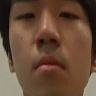

file: 0003_0_B_32_00000055.jpg
label: 1
output: 1
result: 1
conf_score: [0.06891767680644989, 0.9310823678970337]


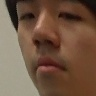

file: 0003_0_B_32_00000060.jpg
label: 1
output: 1
result: 1
conf_score: [0.048108991235494614, 0.9518910050392151]


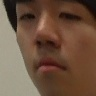

file: 0003_0_B_32_00000075.jpg
label: 1
output: 1
result: 1
conf_score: [0.16164904832839966, 0.8383510112762451]


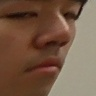

file: 0003_0_B_32_00000085.jpg
label: 1
output: 1
result: 1
conf_score: [0.24963951110839844, 0.7503604292869568]


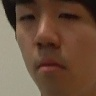

file: 0003_0_B_32_00000105.jpg
label: 1
output: 1
result: 1
conf_score: [0.14968597888946533, 0.8503140211105347]


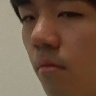

file: 0003_0_B_32_00000110.jpg
label: 1
output: 1
result: 1
conf_score: [0.04844236373901367, 0.9515576958656311]


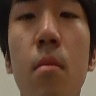

file: 0003_0_B_32_00000125.jpg
label: 1
output: 1
result: 1
conf_score: [0.023286111652851105, 0.9767138957977295]


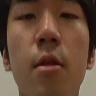

file: 0003_0_B_32_00000130.jpg
label: 1
output: 1
result: 1
conf_score: [0.036450013518333435, 0.9635499715805054]


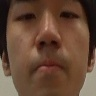

file: 0003_0_B_32_00000135.jpg
label: 1
output: 1
result: 1
conf_score: [0.033847659826278687, 0.9661523103713989]


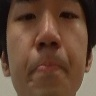

file: 0003_0_B_32_00000140.jpg
label: 1
output: 1
result: 1
conf_score: [0.024354098364710808, 0.9756458401679993]


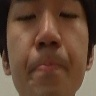

file: 0003_0_B_32_00000145.jpg
label: 0
output: 0
result: 1
conf_score: [0.7857592105865479, 0.21424083411693573]


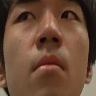

file: 0003_0_B_40_00000230.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999996423721313, 3.08235058810169e-07]


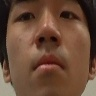

file: 0003_0_B_40_00000245.jpg
label: 0
output: 0
result: 1
conf_score: [0.9953305721282959, 0.004669462330639362]


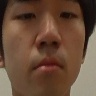

file: 0003_0_B_50_00000005.jpg
label: 1
output: 1
result: 1
conf_score: [0.0603119358420372, 0.9396880269050598]


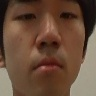

file: 0003_0_B_50_00000010.jpg
label: 1
output: 1
result: 1
conf_score: [0.034898340702056885, 0.9651017189025879]


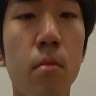

file: 0003_0_B_50_00000015.jpg
label: 1
output: 1
result: 1
conf_score: [0.06708023697137833, 0.9329197406768799]


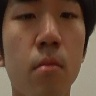

file: 0003_0_B_50_00000020.jpg
label: 1
output: 1
result: 1
conf_score: [0.050098713487386703, 0.9499013423919678]


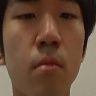

file: 0003_0_B_50_00000025.jpg
label: 1
output: 1
result: 1
conf_score: [0.13492733240127563, 0.8650726675987244]


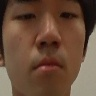

file: 0003_0_B_50_00000030.jpg
label: 1
output: 1
result: 1
conf_score: [0.07149934023618698, 0.9285006523132324]


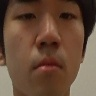

file: 0003_0_B_50_00000035.jpg
label: 1
output: 1
result: 1
conf_score: [0.07149870693683624, 0.928501307964325]


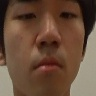

file: 0003_0_B_50_00000040.jpg
label: 1
output: 1
result: 1
conf_score: [0.13036899268627167, 0.8696310520172119]


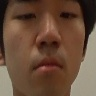

file: 0003_0_B_50_00000045.jpg
label: 1
output: 1
result: 1
conf_score: [0.05507323518395424, 0.9449267387390137]


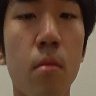

file: 0003_0_B_50_00000050.jpg
label: 1
output: 1
result: 1
conf_score: [0.05598188564181328, 0.9440180659294128]


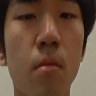

file: 0003_0_B_50_00000055.jpg
label: 1
output: 1
result: 1
conf_score: [0.08002679795026779, 0.9199731945991516]


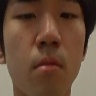

file: 0003_0_B_50_00000060.jpg
label: 1
output: 1
result: 1
conf_score: [0.09108270704746246, 0.9089173078536987]


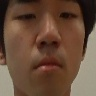

file: 0003_0_B_50_00000065.jpg
label: 1
output: 1
result: 1
conf_score: [0.15607976913452148, 0.8439202904701233]


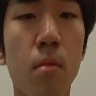

file: 0003_0_B_50_00000070.jpg
label: 1
output: 1
result: 1
conf_score: [0.056113723665475845, 0.9438862800598145]


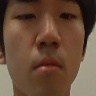

file: 0003_0_B_50_00000075.jpg
label: 1
output: 1
result: 1
conf_score: [0.27900898456573486, 0.7209910154342651]


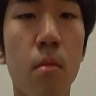

file: 0003_0_B_50_00000080.jpg
label: 1
output: 1
result: 1
conf_score: [0.025791814550757408, 0.9742082357406616]


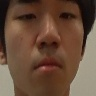

file: 0003_0_B_50_00000085.jpg
label: 1
output: 1
result: 1
conf_score: [0.23568479716777802, 0.7643152475357056]


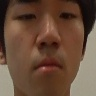

file: 0003_0_B_50_00000090.jpg
label: 1
output: 1
result: 1
conf_score: [0.2265499085187912, 0.7734501361846924]


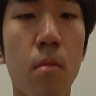

file: 0003_0_B_50_00000095.jpg
label: 1
output: 1
result: 1
conf_score: [0.09768630564212799, 0.9023136496543884]


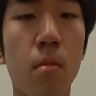

file: 0003_0_B_50_00000100.jpg
label: 1
output: 1
result: 1
conf_score: [0.07276526093482971, 0.9272347092628479]


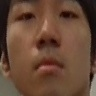

file: 0003_0_C_00_00000005.jpg
label: 1
output: 1
result: 1
conf_score: [0.028591999784111977, 0.971407949924469]


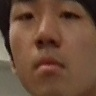

file: 0003_0_C_00_00000010.jpg
label: 1
output: 1
result: 1
conf_score: [0.2754156291484833, 0.7245844006538391]


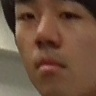

file: 0003_0_C_00_00000030.jpg
label: 1
output: 1
result: 1
conf_score: [0.4243258237838745, 0.5756741762161255]


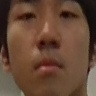

file: 0003_0_C_00_00000035.jpg
label: 1
output: 1
result: 1
conf_score: [0.06799396872520447, 0.9320060610771179]


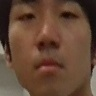

file: 0003_0_C_00_00000045.jpg
label: 1
output: 1
result: 1
conf_score: [0.01664150506258011, 0.9833584427833557]


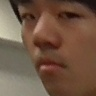

file: 0003_0_C_00_00000050.jpg
label: 1
output: 1
result: 1
conf_score: [0.1909196823835373, 0.8090803623199463]


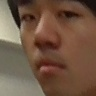

file: 0003_0_C_00_00000065.jpg
label: 1
output: 1
result: 1
conf_score: [0.19188079237937927, 0.8081192374229431]


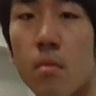

file: 0003_0_C_00_00000070.jpg
label: 1
output: 1
result: 1
conf_score: [0.04505853354930878, 0.95494145154953]


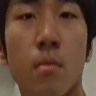

file: 0003_0_C_00_00000075.jpg
label: 1
output: 1
result: 1
conf_score: [0.028535962104797363, 0.9714639782905579]


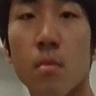

file: 0003_0_C_00_00000080.jpg
label: 1
output: 1
result: 1
conf_score: [0.03693658486008644, 0.9630634188652039]


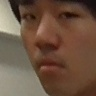

file: 0003_0_C_00_00000085.jpg
label: 1
output: 1
result: 1
conf_score: [0.033429961651563644, 0.9665700197219849]


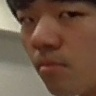

file: 0003_0_C_00_00000095.jpg
label: 1
output: 1
result: 1
conf_score: [0.10583782196044922, 0.894162118434906]


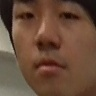

file: 0003_0_C_00_00000115.jpg
label: 1
output: 1
result: 1
conf_score: [0.1048598662018776, 0.8951401114463806]


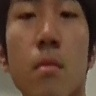

file: 0003_0_C_01_00000005.jpg
label: 1
output: 1
result: 1
conf_score: [0.058784302324056625, 0.9412156343460083]


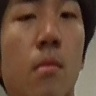

file: 0003_0_C_01_00000010.jpg
label: 1
output: 1
result: 1
conf_score: [0.2550674080848694, 0.7449325919151306]


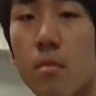

file: 0003_0_C_01_00000020.jpg
label: 1
output: 1
result: 1
conf_score: [0.08248685300350189, 0.9175131320953369]


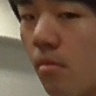

file: 0003_0_C_01_00000025.jpg
label: 1
output: 1
result: 1
conf_score: [0.2982996702194214, 0.7017003297805786]


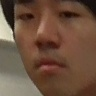

file: 0003_0_C_01_00000040.jpg
label: 1
output: 1
result: 1
conf_score: [0.14158692955970764, 0.85841304063797]


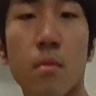

file: 0003_0_C_01_00000045.jpg
label: 1
output: 1
result: 1
conf_score: [0.10795436054468155, 0.8920456171035767]


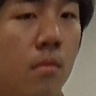

file: 0003_0_C_01_00000055.jpg
label: 1
output: 1
result: 1
conf_score: [0.48821955919265747, 0.5117803812026978]


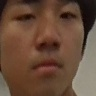

file: 0003_0_C_01_00000060.jpg
label: 1
output: 1
result: 1
conf_score: [0.200251966714859, 0.7997480034828186]


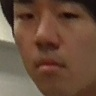

file: 0003_0_C_01_00000065.jpg
label: 1
output: 1
result: 1
conf_score: [0.19031979143619537, 0.8096802234649658]


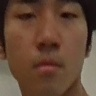

file: 0003_0_C_01_00000090.jpg
label: 1
output: 1
result: 1
conf_score: [0.3560141623020172, 0.64398592710495]


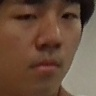

file: 0003_0_C_01_00000095.jpg
label: 1
output: 1
result: 1
conf_score: [0.2988079786300659, 0.7011919617652893]


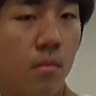

file: 0003_0_C_01_00000100.jpg
label: 1
output: 1
result: 1
conf_score: [0.4506900906562805, 0.5493099093437195]


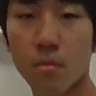

file: 0003_0_C_01_00000105.jpg
label: 1
output: 1
result: 1
conf_score: [0.08925601840019226, 0.9107440114021301]


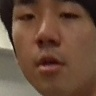

file: 0003_0_C_01_00000130.jpg
label: 1
output: 1
result: 1
conf_score: [0.3085111081600189, 0.6914888620376587]


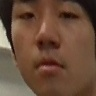

file: 0003_0_C_01_00000135.jpg
label: 1
output: 1
result: 1
conf_score: [0.11799833178520203, 0.8820016980171204]


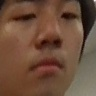

file: 0003_0_C_07_00000005.jpg
label: 0
output: 0
result: 1
conf_score: [0.5842334032058716, 0.4157665967941284]


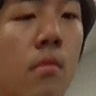

file: 0003_0_C_07_00000010.jpg
label: 0
output: 0
result: 1
conf_score: [0.5481157302856445, 0.45188429951667786]


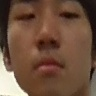

file: 0003_0_C_07_00000015.jpg
label: 0
output: 0
result: 1
conf_score: [0.9887917041778564, 0.011208271607756615]


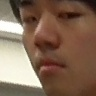

file: 0003_0_C_07_00000030.jpg
label: 0
output: 0
result: 1
conf_score: [0.7202691435813904, 0.2797308564186096]


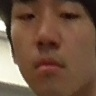

file: 0003_0_C_07_00000035.jpg
label: 0
output: 0
result: 1
conf_score: [0.9627251029014587, 0.03727485239505768]


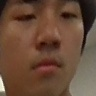

file: 0003_0_C_07_00000040.jpg
label: 0
output: 0
result: 1
conf_score: [0.8557978868484497, 0.1442020982503891]


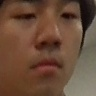

file: 0003_0_C_07_00000050.jpg
label: 0
output: 0
result: 1
conf_score: [0.9809524416923523, 0.019047601148486137]


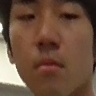

file: 0003_0_C_07_00000055.jpg
label: 0
output: 0
result: 1
conf_score: [0.9992769360542297, 0.0007230519549921155]


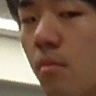

file: 0003_0_C_07_00000060.jpg
label: 0
output: 0
result: 1
conf_score: [0.5514693856239319, 0.4485306739807129]


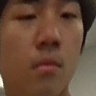

file: 0003_0_C_07_00000080.jpg
label: 0
output: 0
result: 1
conf_score: [0.8881116509437561, 0.11188838630914688]


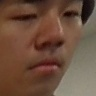

file: 0003_0_C_07_00000085.jpg
label: 0
output: 0
result: 1
conf_score: [0.9978162050247192, 0.002183776581659913]


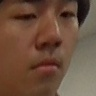

file: 0003_0_C_07_00000090.jpg
label: 0
output: 0
result: 1
conf_score: [0.9864344596862793, 0.013565504923462868]


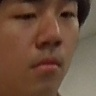

file: 0003_0_C_07_00000095.jpg
label: 0
output: 0
result: 1
conf_score: [0.9985460042953491, 0.0014540455304086208]


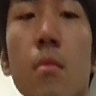

file: 0003_0_C_07_00000100.jpg
label: 0
output: 0
result: 1
conf_score: [0.7422983050346375, 0.25770169496536255]


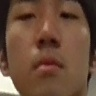

file: 0003_0_C_08_00000005.jpg
label: 0
output: 0
result: 1
conf_score: [0.877572238445282, 0.12242771685123444]


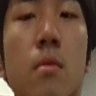

file: 0003_0_C_08_00000010.jpg
label: 0
output: 0
result: 1
conf_score: [0.943520188331604, 0.05647982284426689]


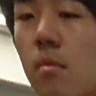

file: 0003_0_C_08_00000040.jpg
label: 0
output: 0
result: 1
conf_score: [0.8268892765045166, 0.17311076819896698]


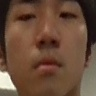

file: 0003_0_C_08_00000045.jpg
label: 0
output: 0
result: 1
conf_score: [0.8880012035369873, 0.11199881136417389]


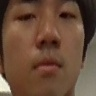

file: 0003_0_C_08_00000050.jpg
label: 0
output: 0
result: 1
conf_score: [0.8908228278160095, 0.10917718708515167]


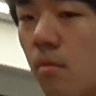

file: 0003_0_C_08_00000080.jpg
label: 0
output: 0
result: 1
conf_score: [0.8049394488334656, 0.19506055116653442]


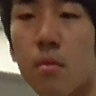

file: 0003_0_C_08_00000085.jpg
label: 0
output: 0
result: 1
conf_score: [0.6328096389770508, 0.36719033122062683]


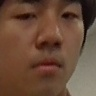

file: 0003_0_C_08_00000095.jpg
label: 0
output: 0
result: 1
conf_score: [0.6819627285003662, 0.3180373013019562]


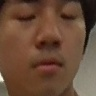

file: 0003_0_C_08_00000100.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999988079071045, 1.1800424317698344e-06]


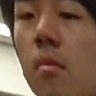

file: 0003_0_C_08_00000105.jpg
label: 0
output: 0
result: 1
conf_score: [0.5375949740409851, 0.4624050557613373]


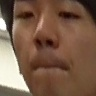

file: 0003_0_C_08_00000125.jpg
label: 0
output: 0
result: 1
conf_score: [0.9719375371932983, 0.02806243486702442]


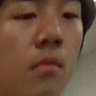

file: 0003_0_C_09_00000005.jpg
label: 0
output: 0
result: 1
conf_score: [0.9805208444595337, 0.01947908289730549]


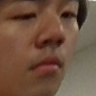

file: 0003_0_C_09_00000010.jpg
label: 0
output: 0
result: 1
conf_score: [0.9987087249755859, 0.0012913147220388055]


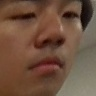

file: 0003_0_C_09_00000015.jpg
label: 0
output: 0
result: 1
conf_score: [0.9988253712654114, 0.0011746728559955955]


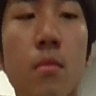

file: 0003_0_C_09_00000020.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999669790267944, 3.2967487641144544e-05]


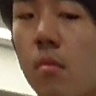

file: 0003_0_C_09_00000025.jpg
label: 0
output: 0
result: 1
conf_score: [0.9925754070281982, 0.007424581330269575]


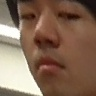

file: 0003_0_C_09_00000030.jpg
label: 0
output: 0
result: 1
conf_score: [0.9761557579040527, 0.023844238370656967]


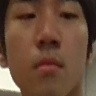

file: 0003_0_C_09_00000045.jpg
label: 0
output: 0
result: 1
conf_score: [0.9989113807678223, 0.0010886022355407476]


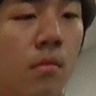

file: 0003_0_C_09_00000050.jpg
label: 0
output: 0
result: 1
conf_score: [0.9969815611839294, 0.003018380841240287]


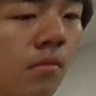

file: 0003_0_C_09_00000055.jpg
label: 0
output: 0
result: 1
conf_score: [0.9926544427871704, 0.007345584221184254]


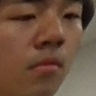

file: 0003_0_C_09_00000065.jpg
label: 0
output: 0
result: 1
conf_score: [0.9973965883255005, 0.0026033560279756784]


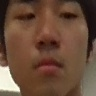

file: 0003_0_C_09_00000070.jpg
label: 0
output: 0
result: 1
conf_score: [0.9997891783714294, 0.0002108919434249401]


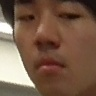

file: 0003_0_C_09_00000075.jpg
label: 0
output: 0
result: 1
conf_score: [0.9968055486679077, 0.0031944646034389734]


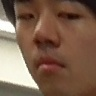

file: 0003_0_C_09_00000085.jpg
label: 0
output: 0
result: 1
conf_score: [0.958818793296814, 0.04118117690086365]


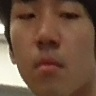

file: 0003_0_C_09_00000090.jpg
label: 0
output: 0
result: 1
conf_score: [0.997994065284729, 0.0020059417001903057]


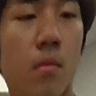

file: 0003_0_C_09_00000095.jpg
label: 0
output: 0
result: 1
conf_score: [0.9997469782829285, 0.00025296572130173445]


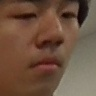

file: 0003_0_C_09_00000100.jpg
label: 0
output: 0
result: 1
conf_score: [0.942588746547699, 0.05741123482584953]


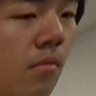

file: 0003_0_C_09_00000110.jpg
label: 0
output: 0
result: 1
conf_score: [0.9969009160995483, 0.0030990480445325375]


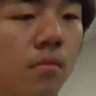

file: 0003_0_C_09_00000115.jpg
label: 0
output: 0
result: 1
conf_score: [0.922157347202301, 0.07784269750118256]


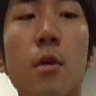

file: 0003_0_C_09_00000120.jpg
label: 0
output: 0
result: 1
conf_score: [0.9995716214179993, 0.0004283169109839946]


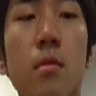

file: 0003_0_C_09_00000125.jpg
label: 0
output: 0
result: 1
conf_score: [0.9986652135848999, 0.0013347921194508672]


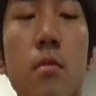

file: 0003_0_C_09_00000130.jpg
label: 0
output: 0
result: 1
conf_score: [0.9985033273696899, 0.0014967311872169375]


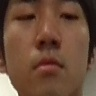

file: 0003_0_C_09_00000135.jpg
label: 0
output: 0
result: 1
conf_score: [0.9986388087272644, 0.001361199072562158]


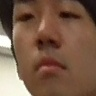

file: 0003_0_C_10_00000005.jpg
label: 0
output: 0
result: 1
conf_score: [0.9992445707321167, 0.0007554975454695523]


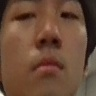

file: 0003_0_C_10_00000010.jpg
label: 0
output: 0
result: 1
conf_score: [0.8894875049591064, 0.11051253229379654]


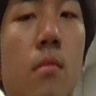

file: 0003_0_C_10_00000020.jpg
label: 0
output: 0
result: 1
conf_score: [0.9905256032943726, 0.009474383667111397]


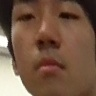

file: 0003_0_C_10_00000025.jpg
label: 0
output: 0
result: 1
conf_score: [0.9929443001747131, 0.007055713329464197]


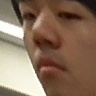

file: 0003_0_C_10_00000030.jpg
label: 0
output: 0
result: 1
conf_score: [0.8538409471511841, 0.1461590677499771]


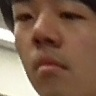

file: 0003_0_C_10_00000055.jpg
label: 0
output: 0
result: 1
conf_score: [0.9271286129951477, 0.07287140935659409]


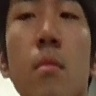

file: 0003_0_C_10_00000060.jpg
label: 0
output: 0
result: 1
conf_score: [0.9931609630584717, 0.006839037872850895]


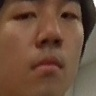

file: 0003_0_C_10_00000065.jpg
label: 0
output: 0
result: 1
conf_score: [0.5202721953392029, 0.4797278344631195]


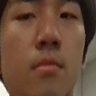

file: 0003_0_C_10_00000075.jpg
label: 0
output: 0
result: 1
conf_score: [0.9877157807350159, 0.012284218333661556]


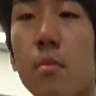

file: 0003_0_C_10_00000080.jpg
label: 0
output: 0
result: 1
conf_score: [0.8681814670562744, 0.13181853294372559]


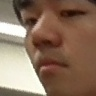

file: 0003_0_C_10_00000105.jpg
label: 0
output: 0
result: 1
conf_score: [0.9991369843482971, 0.0008630178053863347]


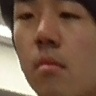

file: 0003_0_C_10_00000110.jpg
label: 0
output: 0
result: 1
conf_score: [0.9973766803741455, 0.002623287495225668]


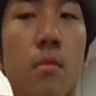

file: 0003_0_C_10_00000115.jpg
label: 0
output: 0
result: 1
conf_score: [0.9992944002151489, 0.000705634243786335]


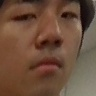

file: 0003_0_C_10_00000120.jpg
label: 0
output: 0
result: 1
conf_score: [0.6985998153686523, 0.30140018463134766]


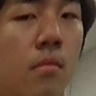

file: 0003_0_C_10_00000125.jpg
label: 0
output: 0
result: 1
conf_score: [0.8755020499229431, 0.1244979128241539]


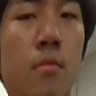

file: 0003_0_C_10_00000130.jpg
label: 0
output: 0
result: 1
conf_score: [0.928766131401062, 0.07123394310474396]


file: 0003_0_C_10_00000135.jpg
label: 0
output: 0
result: 1
conf_score: [0.6491049528121948, 0.35089507699012756]


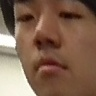

file: 0003_0_C_10_00000150.jpg
label: 0
output: 0
result: 1
conf_score: [0.7777042984962463, 0.22229565680027008]


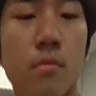

file: 0003_0_C_11_00000005.jpg
label: 0
output: 0
result: 1
conf_score: [0.9547555446624756, 0.04524444416165352]


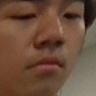

file: 0003_0_C_11_00000010.jpg
label: 0
output: 0
result: 1
conf_score: [0.8751071095466614, 0.12489288300275803]


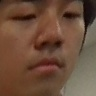

file: 0003_0_C_11_00000015.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999266862869263, 7.32688931748271e-05]


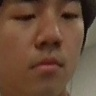

file: 0003_0_C_11_00000020.jpg
label: 0
output: 0
result: 1
conf_score: [0.9604033827781677, 0.03959662467241287]


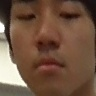

file: 0003_0_C_11_00000025.jpg
label: 0
output: 0
result: 1
conf_score: [0.9865495562553406, 0.013450510799884796]


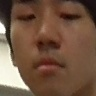

file: 0003_0_C_11_00000050.jpg
label: 0
output: 0
result: 1
conf_score: [0.7816388010978699, 0.21836116909980774]


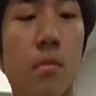

file: 0003_0_C_11_00000055.jpg
label: 0
output: 0
result: 1
conf_score: [0.9802966117858887, 0.01970338262617588]


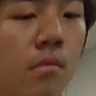

file: 0003_0_C_11_00000060.jpg
label: 0
output: 0
result: 1
conf_score: [0.9693127274513245, 0.030687211081385612]


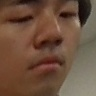

file: 0003_0_C_11_00000065.jpg
label: 0
output: 0
result: 1
conf_score: [0.9631183743476868, 0.03688163682818413]


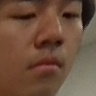

file: 0003_0_C_11_00000070.jpg
label: 0
output: 0
result: 1
conf_score: [0.9841804504394531, 0.015819551423192024]


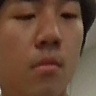

file: 0003_0_C_11_00000075.jpg
label: 0
output: 0
result: 1
conf_score: [0.9888738393783569, 0.011126160621643066]


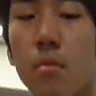

file: 0003_0_C_11_00000080.jpg
label: 0
output: 0
result: 1
conf_score: [0.9993404746055603, 0.0006595440790988505]


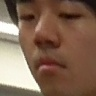

file: 0003_0_C_11_00000085.jpg
label: 0
output: 0
result: 1
conf_score: [0.9197972416877747, 0.08020277321338654]


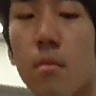

file: 0003_0_C_11_00000100.jpg
label: 0
output: 0
result: 1
conf_score: [0.9506335258483887, 0.04936641827225685]


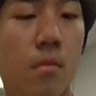

file: 0003_0_C_11_00000105.jpg
label: 0
output: 0
result: 1
conf_score: [0.9929312467575073, 0.007068710867315531]


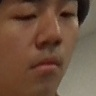

file: 0003_0_C_11_00000110.jpg
label: 0
output: 0
result: 1
conf_score: [0.9998897314071655, 0.00011020623060176149]


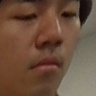

file: 0003_0_C_11_00000115.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999340772628784, 6.586345261894166e-05]


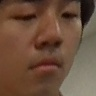

file: 0003_0_C_11_00000120.jpg
label: 0
output: 0
result: 1
conf_score: [0.9997531771659851, 0.00024679413763806224]


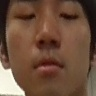

file: 0003_0_C_11_00000130.jpg
label: 0
output: 0
result: 1
conf_score: [0.9918528199195862, 0.008147195912897587]


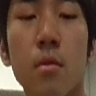

file: 0003_0_C_11_00000135.jpg
label: 0
output: 0
result: 1
conf_score: [0.9963197708129883, 0.0036801949609071016]


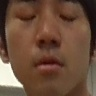

file: 0003_0_C_11_00000140.jpg
label: 0
output: 0
result: 1
conf_score: [1.0, 4.8277065900492744e-08]


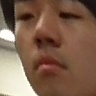

file: 0003_0_C_12_00000005.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999997615814209, 2.122656326264405e-07]


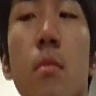

file: 0003_0_C_12_00000010.jpg
label: 0
output: 0
result: 1
conf_score: [0.9997935891151428, 0.00020642134768422693]


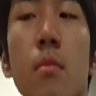

file: 0003_0_C_12_00000015.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999107122421265, 8.930206240620464e-05]


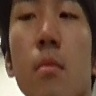

file: 0003_0_C_12_00000020.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999021291732788, 9.786329610506073e-05]


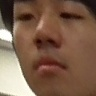

file: 0003_0_C_12_00000025.jpg
label: 0
output: 0
result: 1
conf_score: [0.999995231628418, 4.824639290745836e-06]


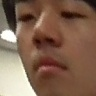

file: 0003_0_C_12_00000055.jpg
label: 0
output: 0
result: 1
conf_score: [0.999996542930603, 3.4571341984701576e-06]


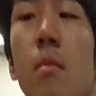

file: 0003_0_C_12_00000060.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999364614486694, 6.352394120767713e-05]


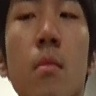

file: 0003_0_C_12_00000065.jpg
label: 0
output: 0
result: 1
conf_score: [0.9974859952926636, 0.0025139523204416037]


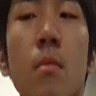

file: 0003_0_C_12_00000070.jpg
label: 0
output: 0
result: 1
conf_score: [0.9991961121559143, 0.0008038780651986599]


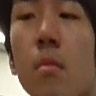

file: 0003_0_C_12_00000075.jpg
label: 0
output: 0
result: 1
conf_score: [0.9998373985290527, 0.00016255638911388814]


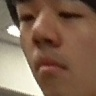

file: 0003_0_C_12_00000105.jpg
label: 0
output: 0
result: 1
conf_score: [0.9998739957809448, 0.00012598805187735707]


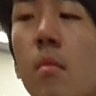

file: 0003_0_C_12_00000110.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999971389770508, 2.8631304758164333e-06]


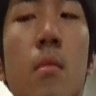

file: 0003_0_C_12_00000115.jpg
label: 0
output: 0
result: 1
conf_score: [0.9969173669815063, 0.0030826556030660868]


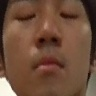

file: 0003_0_C_12_00000125.jpg
label: 0
output: 0
result: 1
conf_score: [0.9981067180633545, 0.0018933243118226528]


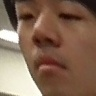

file: 0003_0_C_12_00000130.jpg
label: 0
output: 0
result: 1
conf_score: [0.9996300935745239, 0.0003698442014865577]


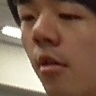

file: 0003_0_C_12_00000135.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999610185623169, 3.892802487825975e-05]


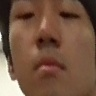

file: 0003_0_C_13_00000005.jpg
label: 0
output: 0
result: 1
conf_score: [0.927475094795227, 0.07252486050128937]


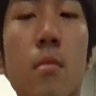

file: 0003_0_C_13_00000025.jpg
label: 0
output: 0
result: 1
conf_score: [0.8032875061035156, 0.1967124491930008]


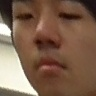

file: 0003_0_C_13_00000030.jpg
label: 0
output: 0
result: 1
conf_score: [0.6042690873146057, 0.3957309126853943]


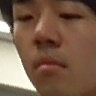

file: 0003_0_C_13_00000055.jpg
label: 0
output: 0
result: 1
conf_score: [0.9997203946113586, 0.0002795641194097698]


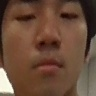

file: 0003_0_C_13_00000080.jpg
label: 0
output: 0
result: 1
conf_score: [0.7493891716003418, 0.2506107687950134]


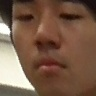

file: 0003_0_C_13_00000085.jpg
label: 0
output: 0
result: 1
conf_score: [0.7646294236183167, 0.23537054657936096]


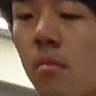

file: 0003_0_C_13_00000110.jpg
label: 0
output: 0
result: 1
conf_score: [0.9968655705451965, 0.003134361235424876]


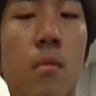

file: 0003_0_C_13_00000115.jpg
label: 0
output: 0
result: 1
conf_score: [0.9738287925720215, 0.026171252131462097]


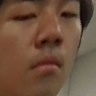

file: 0003_0_C_13_00000120.jpg
label: 0
output: 0
result: 1
conf_score: [0.9554765224456787, 0.0445234514772892]


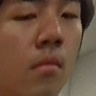

file: 0003_0_C_13_00000130.jpg
label: 0
output: 0
result: 1
conf_score: [0.895776093006134, 0.10422395169734955]


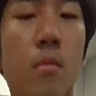

file: 0003_0_C_13_00000135.jpg
label: 0
output: 0
result: 1
conf_score: [0.8728243112564087, 0.12717567384243011]


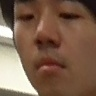

file: 0003_0_C_13_00000140.jpg
label: 0
output: 0
result: 1
conf_score: [0.7780640721321106, 0.22193598747253418]


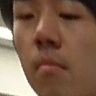

file: 0003_0_C_13_00000145.jpg
label: 0
output: 0
result: 1
conf_score: [0.9904166460037231, 0.009583398699760437]


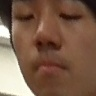

file: 0003_0_C_13_00000150.jpg
label: 0
output: 0
result: 1
conf_score: [0.9924780130386353, 0.0075219073332846165]


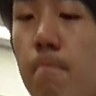

file: 0003_0_C_13_00000155.jpg
label: 0
output: 0
result: 1
conf_score: [0.8298953771591187, 0.17010465264320374]


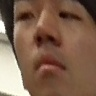

file: 0003_0_C_16_00000010.jpg
label: 0
output: 0
result: 1
conf_score: [1.0, 4.026259148304234e-08]


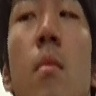

file: 0003_0_C_16_00000015.jpg
label: 0
output: 0
result: 1
conf_score: [0.999947190284729, 5.284801227389835e-05]


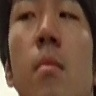

file: 0003_0_C_16_00000020.jpg
label: 0
output: 0
result: 1
conf_score: [0.999984622001648, 1.532815622340422e-05]


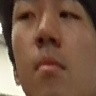

file: 0003_0_C_16_00000025.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999998807907104, 1.0900394187274287e-07]


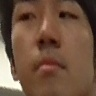

file: 0003_0_C_16_00000070.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999967813491821, 3.2261320939142024e-06]


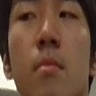

file: 0003_0_C_16_00000075.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999405145645142, 5.95046003581956e-05]


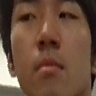

file: 0003_0_C_16_00000080.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999971389770508, 2.812196498780395e-06]


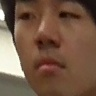

file: 0003_0_C_16_00000085.jpg
label: 0
output: 0
result: 1
conf_score: [1.0, 1.2455052544879663e-09]


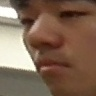

file: 0003_0_C_16_00000090.jpg
label: 0
output: 0
result: 1
conf_score: [0.9997522234916687, 0.0002477837260812521]


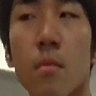

file: 0003_0_C_16_00000125.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999979734420776, 1.9757601421588333e-06]


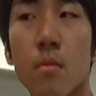

file: 0003_0_C_16_00000135.jpg
label: 0
output: 0
result: 1
conf_score: [1.0, 7.702325444114422e-10]


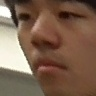

file: 0003_0_C_16_00000140.jpg
label: 0
output: 0
result: 1
conf_score: [1.0, 3.539725623724621e-09]


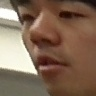

file: 0003_0_C_16_00000145.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999970197677612, 3.0032942959223874e-06]


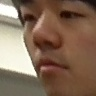

file: 0003_0_C_16_00000150.jpg
label: 0
output: 0
result: 1
conf_score: [0.999915361404419, 8.461787365376949e-05]


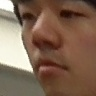

file: 0003_0_C_16_00000155.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999122619628906, 8.769737178226933e-05]


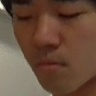

file: 0003_0_C_17_00000125.jpg
label: 0
output: 0
result: 1
conf_score: [1.0, 1.7802047835857593e-08]


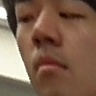

file: 0003_0_C_18_00000015.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999998807907104, 1.3158702927285049e-07]


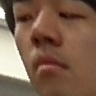

file: 0003_0_C_18_00000020.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999996423721313, 3.851033341106813e-07]


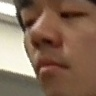

file: 0003_0_C_18_00000065.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999738931655884, 2.6153287763008848e-05]


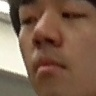

file: 0003_0_C_18_00000070.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999781847000122, 2.1862528228666633e-05]


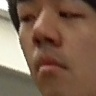

file: 0003_0_C_18_00000075.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999985694885254, 1.3794330016025924e-06]


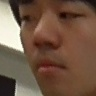

file: 0003_0_C_18_00000135.jpg
label: 0
output: 0
result: 1
conf_score: [1.0, 2.3951074012984463e-08]


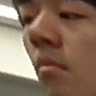

file: 0003_0_C_20_00000025.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999959468841553, 4.070822342328029e-06]


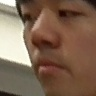

file: 0003_0_C_20_00000070.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999802112579346, 1.973449980141595e-05]


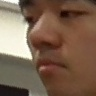

file: 0003_0_C_20_00000090.jpg
label: 0
output: 0
result: 1
conf_score: [0.9994075298309326, 0.000592471391428262]


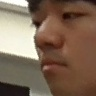

file: 0003_0_C_20_00000125.jpg
label: 0
output: 0
result: 1
conf_score: [0.9998555183410645, 0.00014446713612414896]


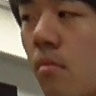

file: 0003_0_C_20_00000130.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999997615814209, 1.879803335214092e-07]


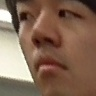

file: 0003_0_C_21_00000020.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999992847442627, 7.526221565967717e-07]


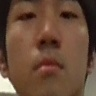

file: 0003_0_C_31_00000005.jpg
label: 1
output: 1
result: 1
conf_score: [0.055951736867427826, 0.944048285484314]


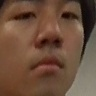

file: 0003_0_C_31_00000015.jpg
label: 1
output: 1
result: 1
conf_score: [0.07342550158500671, 0.9265745282173157]


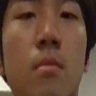

file: 0003_0_C_31_00000020.jpg
label: 1
output: 1
result: 1
conf_score: [0.15079310536384583, 0.8492068648338318]


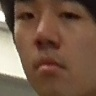

file: 0003_0_C_31_00000025.jpg
label: 1
output: 1
result: 1
conf_score: [0.1470060795545578, 0.852993905544281]


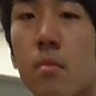

file: 0003_0_C_31_00000050.jpg
label: 1
output: 1
result: 1
conf_score: [0.04478318244218826, 0.9552168250083923]


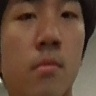

file: 0003_0_C_31_00000055.jpg
label: 1
output: 1
result: 1
conf_score: [0.07084058225154877, 0.92915940284729]


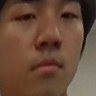

file: 0003_0_C_31_00000060.jpg
label: 1
output: 1
result: 1
conf_score: [0.12563815712928772, 0.8743618130683899]


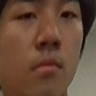

file: 0003_0_C_31_00000065.jpg
label: 1
output: 1
result: 1
conf_score: [0.17265154421329498, 0.8273484706878662]


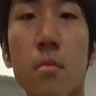

file: 0003_0_C_31_00000070.jpg
label: 1
output: 1
result: 1
conf_score: [0.13503605127334595, 0.864963948726654]


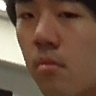

file: 0003_0_C_31_00000075.jpg
label: 1
output: 1
result: 1
conf_score: [0.0803675428032875, 0.9196324944496155]


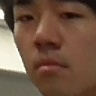

file: 0003_0_C_31_00000095.jpg
label: 1
output: 1
result: 1
conf_score: [0.008064359426498413, 0.9919356107711792]


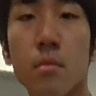

file: 0003_0_C_31_00000100.jpg
label: 1
output: 1
result: 1
conf_score: [0.05779041349887848, 0.9422096014022827]


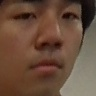

file: 0003_0_C_31_00000115.jpg
label: 1
output: 1
result: 1
conf_score: [0.029108265414834023, 0.9708917737007141]


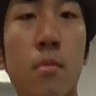

file: 0003_0_C_31_00000120.jpg
label: 1
output: 1
result: 1
conf_score: [0.35296040773391724, 0.6470395922660828]


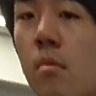

file: 0003_0_C_31_00000125.jpg
label: 1
output: 1
result: 1
conf_score: [0.08924330770969391, 0.9107566475868225]


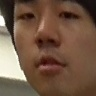

file: 0003_0_C_31_00000130.jpg
label: 1
output: 1
result: 1
conf_score: [0.07415417581796646, 0.9258458614349365]


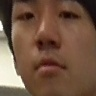

file: 0003_0_C_31_00000135.jpg
label: 1
output: 1
result: 1
conf_score: [0.113524429500103, 0.8864755034446716]


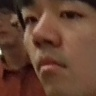

file: 0003_0_C_40_00000155.jpg
label: 0
output: 0
result: 1
conf_score: [0.9992116689682007, 0.0007883140351623297]


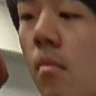

file: 0003_0_C_40_00000185.jpg
label: 0
output: 0
result: 1
conf_score: [0.9999995231628418, 4.26024513444645e-07]


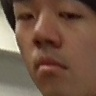

file: 0003_0_C_50_00000005.jpg
label: 1
output: 1
result: 1
conf_score: [0.16178786754608154, 0.8382121324539185]


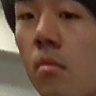

file: 0003_0_C_50_00000015.jpg
label: 1
output: 1
result: 1
conf_score: [0.2746278643608093, 0.7253721356391907]


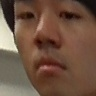

file: 0003_0_C_50_00000020.jpg
label: 1
output: 1
result: 1
conf_score: [0.13964307308197021, 0.8603569269180298]


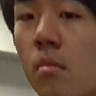

file: 0003_0_C_50_00000025.jpg
label: 1
output: 1
result: 1
conf_score: [0.3742232620716095, 0.6257767081260681]


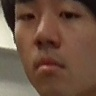

file: 0003_0_C_50_00000040.jpg
label: 1
output: 1
result: 1
conf_score: [0.3387450575828552, 0.6612550020217896]


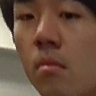

file: 0003_0_C_50_00000045.jpg
label: 1
output: 1
result: 1
conf_score: [0.10120414942502975, 0.8987958431243896]


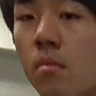

file: 0003_0_C_50_00000050.jpg
label: 1
output: 1
result: 1
conf_score: [0.0498964749276638, 0.9501034617424011]


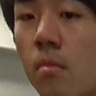

file: 0003_0_C_50_00000055.jpg
label: 1
output: 1
result: 1
conf_score: [0.1731441468000412, 0.8268558382987976]


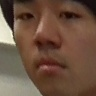

file: 0003_0_C_50_00000065.jpg
label: 1
output: 1
result: 1
conf_score: [0.038788288831710815, 0.9612116813659668]


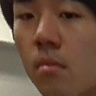

file: 0003_0_C_50_00000070.jpg
label: 1
output: 1
result: 1
conf_score: [0.06858450174331665, 0.9314154386520386]


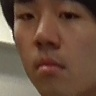

file: 0003_0_C_50_00000075.jpg
label: 1
output: 1
result: 1
conf_score: [0.04693697392940521, 0.9530630111694336]


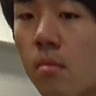

file: 0003_0_C_50_00000085.jpg
label: 1
output: 1
result: 1
conf_score: [0.04588840529322624, 0.9541115760803223]


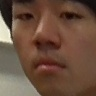

file: 0003_0_C_50_00000090.jpg
label: 1
output: 1
result: 1
conf_score: [0.14649967849254608, 0.8535003066062927]


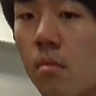

file: 0003_0_C_50_00000095.jpg
label: 1
output: 1
result: 1
conf_score: [0.0791199654340744, 0.9208800792694092]


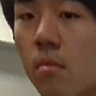

file: 0003_0_C_50_00000100.jpg
label: 1
output: 1
result: 1
conf_score: [0.09238026291131973, 0.9076197147369385]


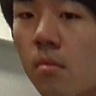

file: 0003_0_C_50_00000105.jpg
label: 1
output: 1
result: 1
conf_score: [0.08523081243038177, 0.914769172668457]


In [253]:
for result in correct:
    print(result)

In [258]:
result_dir = "../train/result/"
result_path = os.path.join(result_dir, config, "all.json")
with open(result_path) as fr:
    result = json.load(fr)

paths = result[pid]['test']['paths']
ts = result[pid]['test']['t']
ys = result[pid]['test']['y']
probs = result[pid]['test']['probs']
wrong = []
correct = []

## ROC curve

In [264]:
def calculate_roc_curve(results, pids=None):
    ts = []
    confs = []
    for pid, result in results.items():
        if pids and int(pid) not in pids:
            continue
        ts.extend(result['test']['t'])
        confs.extend([prob[1] for prob in result['test']['probs']])
    fpr, tpr, thresholds = metrics.roc_curve(ts, confs)

    auc = metrics.auc(fpr, tpr)

    # ROC曲線をプロット
    plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
    plt.legend()
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)

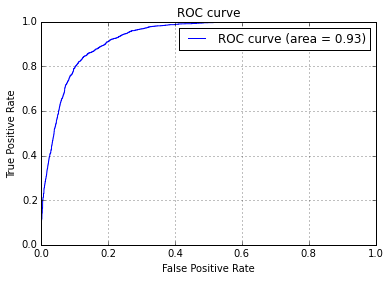

In [269]:
pid = '3'
config = "with_face_feature_v1_00"
result_dir = "../train/result/"
result_path = os.path.join(result_dir, config, "all.json")
with open(result_path) as fr:
    result = json.load(fr)
calculate_roc_curve(result)